Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.preprocessing import OneHotEncoder

Import data

In [3]:
#choose a seed
seed = 1
np.random.seed(seed)
# Load data into train set and test set
digits = datasets.load_digits()
X = digits.data
y = np.array(digits.target, dtype = int)


One hot encode

In [16]:
enc = OneHotEncoder()

y = enc.fit_transform(y.reshape(-1, 1))

In [18]:
X,y = shuffle(X,y)
N,d = X.shape
Ntest = 100
Ntrain = 1697
Xtrain = X[0:Ntrain,:]
ytrain = y[0:Ntrain,:]
Xtest = X[Ntrain:N,:]
ytest = y[Ntrain:N,:]

In [71]:
def getData(digits, Ntrain = 1697, seed = 1):
    np.random.seed(seed)

    # load data
    digits = datasets.load_digits()
    X = digits.data
    y = np.array(digits.target, dtype = int)

    # encode data
    enc = OneHotEncoder()
    y = enc.fit_transform(y.reshape(-1, 1))

    # shuffle
    X,y = shuffle(X,y)

    # extract data
    Ntest = 100
    Xtrain = X[0:Ntrain,:]
    ytrain = y[0:Ntrain,:]
    Xtest = X[Ntrain:Ntrain+Ntest,:]
    ytest = y[Ntrain:Ntrain+Ntest,:]

    return Xtrain, ytrain, Xtest, ytest, enc

In [57]:
kernel = 1.0 * RBF([1.0])
gpr = GaussianProcessRegressor(kernel = kernel, random_state = seed).fit(Xtrain, ytrain.toarray())

In [68]:
def getAccuracy(X, y, gpr, enc, datatype = "Train", printing = True):
    yp = np.argmax(gpr.predict(X), axis = 1)
    accuracy_rate = np.mean(np.equal(yp, enc.inverse_transform(y).reshape(-1))) * 100

    if printing:
        print(datatype, "accuracy:", accuracy_rate)

    return accuracy_rate

In [60]:
getAccuracy(Xtrain, ytrain, gpr, enc)
getAccuracy(Xtest, ytest, gpr, enc, "Test")

Train accuracy: 94.63759575721862
Test accuracy: 94.0


94.0

In [72]:
Xtrain, ytrain, Xtest, ytest, enc = getData(digits)

Constant kernel done
[11.0, 11.0, 10.0, 11.0, 9.0, 5.0, 5.0] 

White kernel done
[11.0, 9.0, 9.0, 9.0, 7.000000000000001, 20.0, 5.0] 

RBF kernel done
[74.0, 86.0, 93.0, 95.0, 95.0, 98.0, 99.0] 

Matern kernel done
[78.0, 83.0, 95.0, 98.0, 99.0, 98.0, 99.0] 

RationalQuadratic kernel done
[62.0, 63.0, 71.0, 90.0, 96.0, 96.0, 95.0] 

DotProduct kernel done
[67.0, 53.0, 78.0, 89.0, 91.0, 96.0, 93.0] 



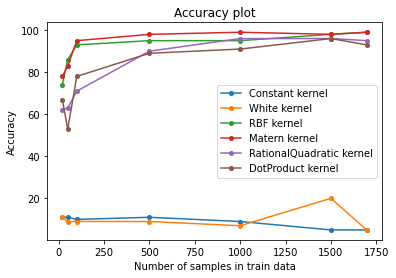

In [93]:
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct

kernels = [ConstantKernel(constant_value_bounds="fixed"), 
            WhiteKernel(noise_level_bounds="fixed"), 
            1.0 * RBF([1.0], length_scale_bounds="fixed"), 
            Matern(length_scale = 100, length_scale_bounds="fixed"), 
            RationalQuadratic(length_scale_bounds="fixed", alpha_bounds="fixed"), 
            DotProduct(sigma_0_bounds="fixed") + WhiteKernel(noise_level_bounds="fixed")]

kernel_names = ["Constant", "White", "RBF", "Matern", "RationalQuadratic", "DotProduct"]

data_sizes = [20, 50, 100, 500, 1000, 1500, 1697]

for (i, kernel) in enumerate(kernels):
    accuracies = []

    for Ntrain in data_sizes:
        Xtrain, ytrain, Xtest, ytest, enc = getData(digits, Ntrain=Ntrain)
        gpr = GaussianProcessRegressor(kernel = kernel, optimizer='fmin_l_bfgs_b', random_state = seed).fit(Xtrain, ytrain.toarray())
        accuracies.append(getAccuracy(Xtest, ytest, gpr, enc, printing = False))

    plt.plot(data_sizes, accuracies, "-o", markersize = 4, label = kernel_names[i] + " kernel")

    print(kernel_names[i] + " kernel done")
    print(accuracies, "\n")

plt.xlabel("Number of samples in train data")
plt.ylabel("Accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.show()

Constant kernel done
[11.0, 11.0, 10.0, 11.0, 9.0, 5.0, 5.0] 

White kernel done
[11.0, 9.0, 9.0, 9.0, 7.000000000000001, 20.0, 5.0] 

RBF kernel done
[70.0, 74.0, 91.0, 98.0, 98.0, 98.0, 100.0] 

Matern kernel done
[77.0, 86.0, 93.0, 95.0, 95.0, 98.0, 99.0] 

RationalQuadratic kernel done
[77.0, 87.0, 94.0, 97.0, 98.0, 99.0, 99.0] 

DotProduct kernel done
[67.0, 53.0, 78.0, 89.0, 91.0, 96.0, 93.0] 



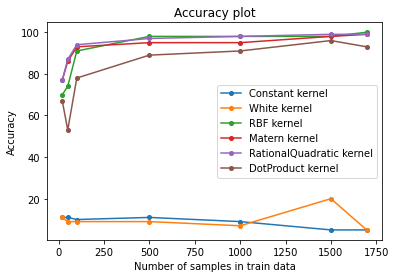

In [109]:
# optimized

from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct

kernels = [ConstantKernel(constant_value_bounds="fixed"), 
            WhiteKernel(1, noise_level_bounds="fixed"), 
            1.0 * RBF([100], length_scale_bounds="fixed"), 
            Matern(length_scale = 1, length_scale_bounds="fixed"), 
            RationalQuadratic(length_scale = 10, length_scale_bounds="fixed", alpha = 100, alpha_bounds="fixed"), 
            DotProduct(1, sigma_0_bounds="fixed") + WhiteKernel(1, noise_level_bounds="fixed")]

kernel_names = ["Constant", "White", "RBF", "Matern", "RationalQuadratic", "DotProduct"]

data_sizes = [20, 50, 100, 500, 1000, 1500, 1697]

for (i, kernel) in enumerate(kernels):
    accuracies = []

    for Ntrain in data_sizes:
        Xtrain, ytrain, Xtest, ytest, enc = getData(digits, Ntrain=Ntrain)
        gpr = GaussianProcessRegressor(kernel = kernel, optimizer='fmin_l_bfgs_b', random_state = seed).fit(Xtrain, ytrain.toarray())
        accuracies.append(getAccuracy(Xtest, ytest, gpr, enc, printing = False))

    plt.plot(data_sizes, accuracies, "-o", markersize = 4, label = kernel_names[i] + " kernel")

    print(kernel_names[i] + " kernel done")
    print(accuracies, "\n")

plt.xlabel("Number of samples in train data")
plt.ylabel("Accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.show()

Test accuracy: 93.0
	 DotProduct(sigma_0=0.01) + WhiteKernel(noise_level=0.01)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.01) + WhiteKernel(noise_level=0.1)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.01) + WhiteKernel(noise_level=1)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.01) + WhiteKernel(noise_level=2)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.01) + WhiteKernel(noise_level=5)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.01) + WhiteKernel(noise_level=10)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.01) + WhiteKernel(noise_level=100)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.1) + WhiteKernel(noise_level=0.01)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.1) + WhiteKernel(noise_level=0.1)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.1) + WhiteKernel(noise_level=1)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.1) + WhiteKernel(noise_level=2)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.1) + WhiteKernel(noise_level=5)
Test accuracy: 93.0
	 DotProduct(sigma_0=0.1) + WhiteKernel(noise_level=10)
Test

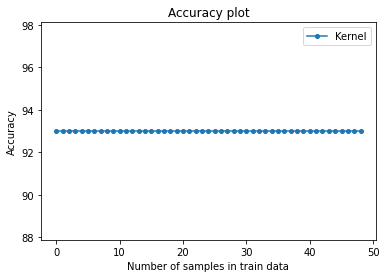

In [105]:
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct

# kernels = [ConstantKernel(x) for x in [0.01, 0.1, 1, 2, 5, 10, 100]] # theta = 5
# kernels = [WhiteKernel(x, noise_level_bounds="fixed") for x in [0.01, 0.1, 1, 2, 5, 10, 100]] # theta = godtycklig
# kernels = [1.0 * RBF([x], length_scale_bounds="fixed") for x in [0.01, 0.1, 1, 2, 5, 10, 100]] # theta = 100
# kernels = [Matern(length_scale = x, length_scale_bounds="fixed", nu = y) for x in [0.01, 0.1, 1, 2, 5, 10, 100] for y in [0.5, 1.5, 2.5, np.inf]] # l >= 0.1, nu godtycklig
# kernels = [RationalQuadratic(length_scale = x, length_scale_bounds="fixed", alpha = y, alpha_bounds="fixed") for x in [0.01, 0.1, 1, 2, 5, 10, 100] for y in [0.01, 0.1, 1, 2, 5, 10, 100]] # 10, 100
kernels = [DotProduct(x, sigma_0_bounds="fixed") + WhiteKernel(y, noise_level_bounds="fixed") for x in [0.01, 0.1, 1, 2, 5, 10, 100] for y in [0.01, 0.1, 1, 2, 5, 10, 100]] # godtycklig

Ntrain = 1697

accuracies = []

for kernel in kernels:
    Xtrain, ytrain, Xtest, ytest, enc = getData(digits, Ntrain=Ntrain)
    gpr = GaussianProcessRegressor(kernel = kernel, optimizer='fmin_l_bfgs_b', random_state = seed).fit(Xtrain, ytrain.toarray())
    accuracies.append(getAccuracy(Xtest, ytest, gpr, enc, "Test", printing = True))
    print("\t", gpr.kernel)

plt.plot(accuracies, "-o", markersize = 4, label = "Kernel")

print(accuracies)

plt.xlabel("Number of samples in train data")
plt.ylabel("Accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.show()

In [59]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel = kernel, random_state = seed).fit(Xtrain, ytrain.toarray())